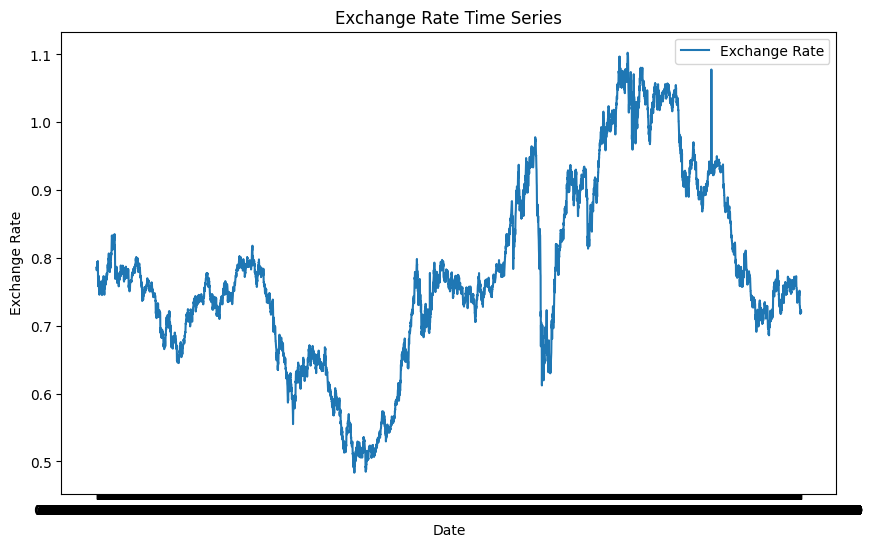

ADF Statistic: -1.6649941807382342
p-value: 0.4492327353597477
The time series is not stationary.
ADF Statistic: -99.39343120118632
p-value: 0.0
The time series is stationary.


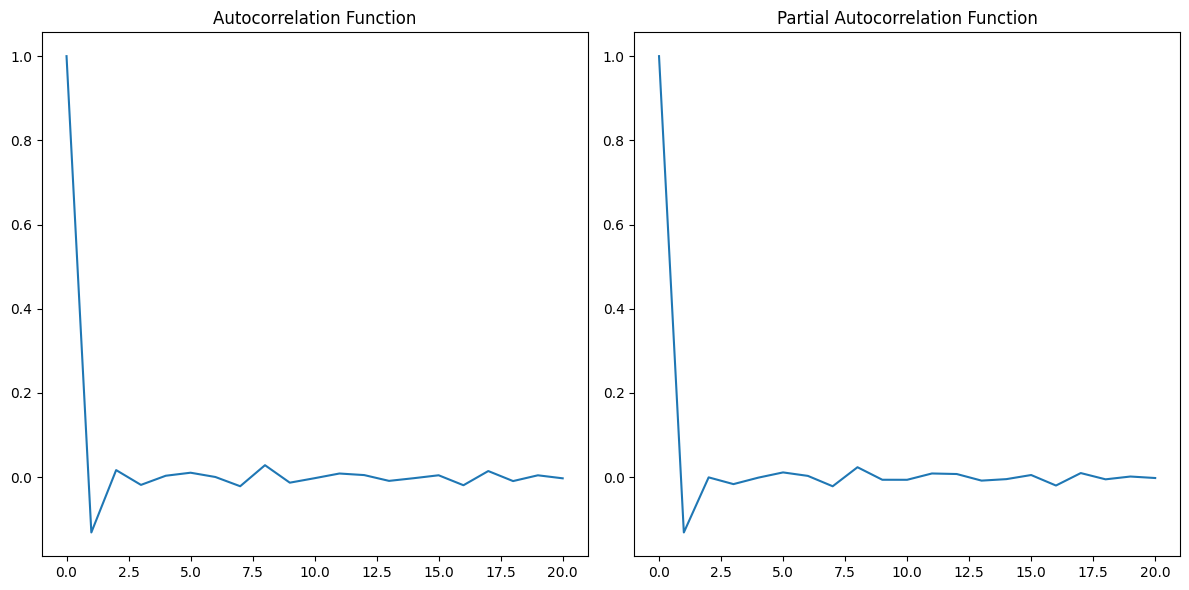

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Mon, 30 Dec 2024   AIC                         -56102.322
Time:                        02:00:29   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

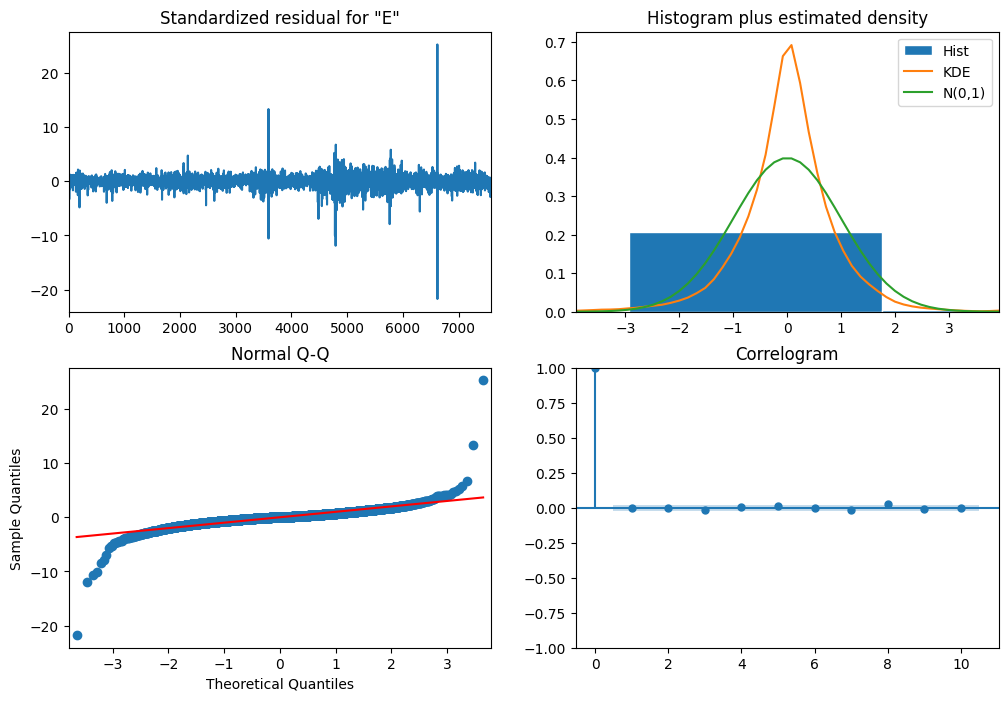

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


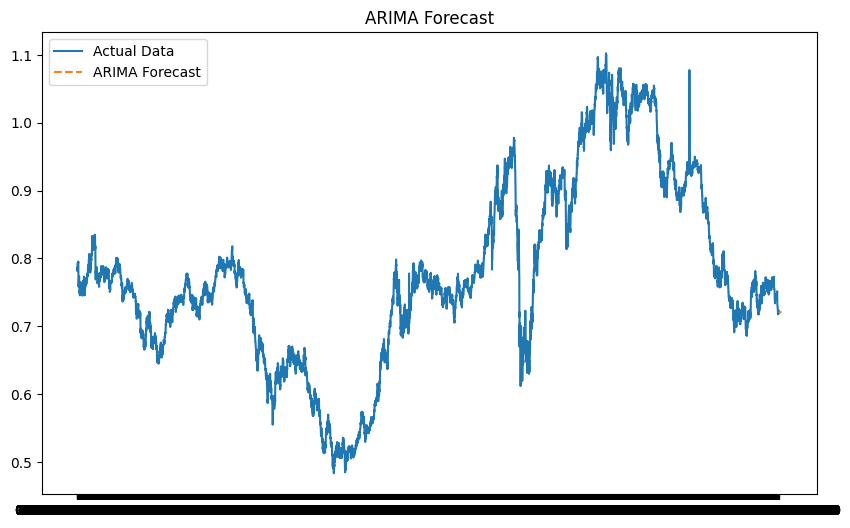

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


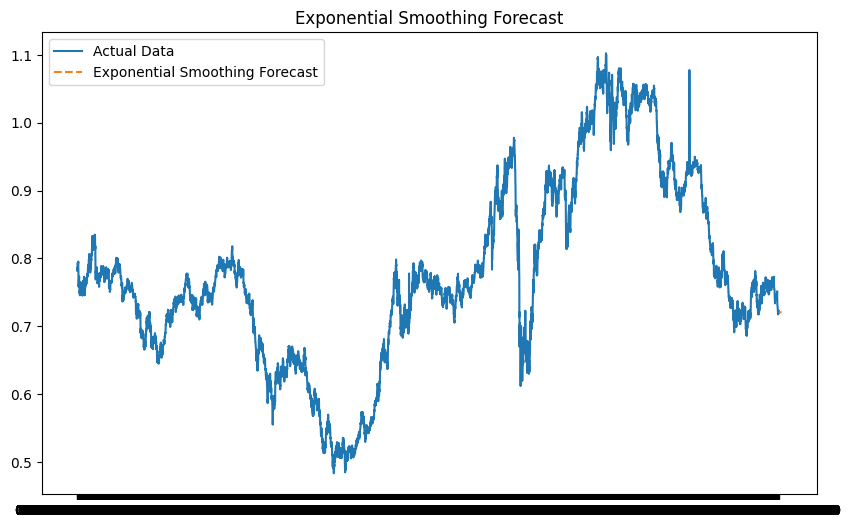

ARIMA MAE: 0.012724006489305202, RMSE: 0.016982710912755217
Exponential Smoothing MAE: 0.012755756156713368, RMSE: 0.017005229952751045
ARIMA performs better based on RMSE.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

data = pd.read_csv('/content/exchange_rate.csv', parse_dates=['date'], index_col='date')

plt.figure(figsize=(10, 6))
plt.plot(data, label='Exchange Rate')
plt.title('Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

if data.isnull().sum().sum() > 0:
    print("Missing values found. Filling with forward fill.")
    data = data.fillna(method='ffill')

def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] <= 0.05:
        print("The time series is stationary.")
    else:
        print("The time series is not stationary.")

check_stationarity(data['Ex_rate'])

data_diff = data['Ex_rate'].diff().dropna()

check_stationarity(data_diff)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(acf(data_diff, nlags=20))
plt.title('Autocorrelation Function')
plt.subplot(122)
plt.plot(pacf(data_diff, nlags=20))
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

p, d, q = 1, 1, 1

arima_model = ARIMA(data['Ex_rate'], order=(p, d, q))
arima_result = arima_model.fit()

print(arima_result.summary())

arima_result.plot_diagnostics(figsize=(12, 8))
plt.show()

forecast_steps = 30
arima_forecast = arima_result.forecast(steps=forecast_steps)
plt.figure(figsize=(10, 6))
plt.plot(data['Ex_rate'], label='Actual Data')
plt.plot(arima_forecast, label='ARIMA Forecast', linestyle='--')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

es_model = ExponentialSmoothing(data['Ex_rate'], seasonal=None, trend='add', seasonal_periods=12)
es_result = es_model.fit()

es_forecast = es_result.forecast(steps=forecast_steps)
plt.figure(figsize=(10, 6))
plt.plot(data['Ex_rate'], label='Actual Data')
plt.plot(es_forecast, label='Exponential Smoothing Forecast', linestyle='--')
plt.title('Exponential Smoothing Forecast')
plt.legend()
plt.show()


arima_mae = mean_absolute_error(data['Ex_rate'][-forecast_steps:], arima_forecast)
arima_rmse = math.sqrt(mean_squared_error(data['Ex_rate'][-forecast_steps:], arima_forecast))

es_mae = mean_absolute_error(data['Ex_rate'][-forecast_steps:], es_forecast)
es_rmse = math.sqrt(mean_squared_error(data['Ex_rate'][-forecast_steps:], es_forecast))

print(f"ARIMA MAE: {arima_mae}, RMSE: {arima_rmse}")
print(f"Exponential Smoothing MAE: {es_mae}, RMSE: {es_rmse}")

if arima_rmse < es_rmse:
    print("ARIMA performs better based on RMSE.")
else:
    print("Exponential Smoothing performs better based on RMSE.")
